In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("healthcare.csv")

In [3]:
data.shape

(9216, 11)

In [4]:
data.head()

,Date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral
0,2020-03-20 8:47:01,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN
1,2020-06-15 11:29:36,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN
2,2020-06-20 9:13:13,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice
3,2020-02-04 22:34:29,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice
4,2020-09-04 17:48:27,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  9216 non-null   object 
 1   patient_id            9216 non-null   object 
 2   patient_gender        9216 non-null   object 
 3   patient_age           9216 non-null   int64  
 4   patient_sat_score     2517 non-null   float64
 5   patient_first_inital  9216 non-null   object 
 6   patient_last_name     9216 non-null   object 
 7   patient_race          9216 non-null   object 
 8   patient_admin_flag    9216 non-null   bool   
 9   patient_waittime      9216 non-null   int64  
 10  department_referral   3816 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 729.1+ KB


In [6]:
data["Date"]=pd.to_datetime(data["Date"])

In [7]:
data["patient_id"]

0       145-39-5406
1       316-34-3057
2       897-46-3852
3       358-31-9711
4       289-26-0537
           ...     
9211    453-45-2632
9212    136-93-5822
9213    822-41-7734
9214    260-14-4032
9215    703-55-3364
Name: patient_id, Length: 9216, dtype: object

In [8]:
# Removing dashes from 'patient_id' and convert to integer type

In [9]:
data['patient_id'] = data['patient_id'].str.replace('-', '').astype(int)

In [10]:
data["patient_id"]

0       145395406
1       316343057
2       897463852
3       358319711
4       289260537
          ...    
9211    453452632
9212    136935822
9213    822417734
9214    260144032
9215    703553364
Name: patient_id, Length: 9216, dtype: int32

In [11]:
# Gender 

In [12]:
data["patient_gender"].unique()

array(['M', 'F', 'NC'], dtype=object)

In [13]:
# Here NC means "Not Specified" or let us consider "Not Classified"

In [14]:
data["patient_gender"].value_counts()

patient_gender
M     4705
F     4487
NC      24
Name: count, dtype: int64

In [15]:
# Score ranges from 0 to 10

In [16]:
data['patient_sat_score'].unique()

array([10., nan,  9.,  8.,  1.,  2.,  4.,  0.,  7.,  3.,  6.,  5.])

In [17]:
data['patient_sat_score'] = data['patient_sat_score'].astype('Int64')

In [18]:
data['patient_sat_score'].unique()

<IntegerArray>
[10, <NA>, 9, 8, 1, 2, 4, 0, 7, 3, 6, 5]
Length: 12, dtype: Int64

In [19]:
# Full name of Patients

In [20]:
data['Fullname']=data["patient_first_inital"]+'.'+ data["patient_last_name"]

In [21]:
data['Fullname']

0          H.Glasspool
1            X.Methuen
2          P.Schubuser
3           U.Titcombe
4        Y.Gionettitti
             ...      
9211           A.Crich
9212           A.Gerbl
9213          J.Dowall
9214          W.Rustan
9215    H.Hickeringill
Name: Fullname, Length: 9216, dtype: object

In [22]:
data.head()

,Date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral,Fullname
0,2020-03-20 08:47:01,145395406,M,69,10,H,Glasspool,White,False,39,NaN,H.Glasspool
1,2020-06-15 11:29:36,316343057,M,4,<NA>,X,Methuen,Native American/Alaska Native,True,27,NaN,X.Methuen
2,2020-06-20 09:13:13,897463852,F,56,9,P,Schubuser,African American,True,55,General Practice,P.Schubuser
3,2020-02-04 22:34:29,358319711,F,24,8,U,Titcombe,Native American/Alaska Native,True,31,General Practice,U.Titcombe
4,2020-09-04 17:48:27,289260537,M,5,<NA>,Y,Gionettitti,African American,False,10,Orthopedics,Y.Gionettitti


In [23]:
data.drop(columns=["patient_first_inital","patient_last_name"],inplace=True)

In [24]:
data.head()

,Date,patient_id,patient_gender,patient_age,patient_sat_score,patient_race,patient_admin_flag,patient_waittime,department_referral,Fullname
0,2020-03-20 08:47:01,145395406,M,69,10,White,False,39,NaN,H.Glasspool
1,2020-06-15 11:29:36,316343057,M,4,<NA>,Native American/Alaska Native,True,27,NaN,X.Methuen
2,2020-06-20 09:13:13,897463852,F,56,9,African American,True,55,General Practice,P.Schubuser
3,2020-02-04 22:34:29,358319711,F,24,8,Native American/Alaska Native,True,31,General Practice,U.Titcombe
4,2020-09-04 17:48:27,289260537,M,5,<NA>,African American,False,10,Orthopedics,Y.Gionettitti


In [25]:
# Race

In [26]:
data["patient_race"].unique()

array(['White', 'Native American/Alaska Native', 'African American',
       'Asian', 'Two or More Races', 'Pacific Islander',
       'Declined to Identify'], dtype=object)

In [27]:
# patient_admin_flag

In [28]:
data['patient_admin_flag'].unique()

array([False,  True])

In [29]:
# patient_waittime

In [30]:
data['patient_waittime']

0       39
1       27
2       55
3       31
4       10
        ..
9211    34
9212    55
9213    52
9214    51
9215    19
Name: patient_waittime, Length: 9216, dtype: int64

In [31]:
# 	department_referral	

In [32]:
data['department_referral'].unique()

array([nan, 'General Practice', 'Orthopedics', 'Gastroenterology',
       'Physiotherapy', 'Neurology', 'Cardiology', 'Renal'], dtype=object)

In [33]:
# Data Cleaning

In [34]:
data.columns

Index(['Date', 'patient_id', 'patient_gender', 'patient_age',
       'patient_sat_score', 'patient_race', 'patient_admin_flag',
       'patient_waittime', 'department_referral', 'Fullname'],
      dtype='object')

In [35]:
data['Date'].isna().sum()

0

In [36]:
data['patient_id'].isna().sum()

0

In [37]:
data['patient_gender'].isna().sum()

0

In [38]:
data['patient_gender'].unique()

array(['M', 'F', 'NC'], dtype=object)

In [39]:
data['patient_gender']

0       M
1       M
2       F
3       F
4       M
       ..
9211    M
9212    M
9213    F
9214    M
9215    M
Name: patient_gender, Length: 9216, dtype: object

In [40]:
data[data['patient_gender']=='NC']

,Date,patient_id,patient_gender,patient_age,patient_sat_score,patient_race,patient_admin_flag,patient_waittime,department_referral,Fullname
355,2020-02-28 09:28:12,706581402,NC,66,<NA>,Asian,False,50,General Practice,J.Garfitt
620,2019-06-19 03:06:27,255922375,NC,70,4,Asian,True,17,NaN,N.Jerdan
664,2020-02-07 03:38:52,180739658,NC,25,<NA>,Two or More Races,False,59,NaN,A.Bewlay
1474,2020-06-12 23:28:49,384245300,NC,46,<NA>,Two or More Races,False,26,General Practice,C.Dempster
1649,2019-06-08 10:20:06,335250106,NC,61,<NA>,African American,False,55,NaN,F.Deely
2062,2020-05-16 17:06:31,412853832,NC,14,<NA>,Asian,True,36,NaN,V.Riccardo
3905,2020-06-27 07:46:18,200987030,NC,65,<NA>,White,False,10,Gastroenterology,Y.Gerckens
3991,2020-05-14 23:43:26,708912439,NC,73,1,Declined to Identify,True,38,General Practice,S.Renals
4006,2019-12-28 02:19:36,110341005,NC,5,<NA>,African American,False,31,Orthopedics,V.Butting
4183,2019-07-12 23:07:21,708208149,NC,43,<NA>,Declined to Identify,False,32,NaN,F.Sculley


In [41]:
# Replace 'NC' (Not Classified) with a common category, such as 'Unknown'
data['patient_gender'].replace('NC', 'Unknown', inplace=True)

In [42]:
data['patient_gender'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [43]:
data['patient_age'].isna().sum()

0

In [44]:
data['patient_sat_score'].isna().sum()

6699

In [45]:
data['patient_sat_score'].unique()

<IntegerArray>
[10, <NA>, 9, 8, 1, 2, 4, 0, 7, 3, 6, 5]
Length: 12, dtype: Int64

In [46]:
data['patient_sat_score'].fillna(0, inplace=True)

In [47]:
data['patient_sat_score'].unique()

<IntegerArray>
[10, 0, 9, 8, 1, 2, 4, 7, 3, 6, 5]
Length: 11, dtype: Int64

In [48]:
data['patient_sat_score'].isna().sum()

0

In [49]:
data['patient_race'].isna().sum()

0

In [50]:
data['patient_admin_flag'].isna().sum()

0

In [51]:
data['patient_waittime'].isna().sum()

0

In [52]:
# Fill missing values with a specific category, such as 'No Referral'
data['department_referral'].fillna('No Referral', inplace=True)

In [53]:
data['department_referral']

0            No Referral
1            No Referral
2       General Practice
3       General Practice
4            Orthopedics
              ...       
9211         No Referral
9212         No Referral
9213         Orthopedics
9214         No Referral
9215         No Referral
Name: department_referral, Length: 9216, dtype: object

In [54]:
data.head()

,Date,patient_id,patient_gender,patient_age,patient_sat_score,patient_race,patient_admin_flag,patient_waittime,department_referral,Fullname
0,2020-03-20 08:47:01,145395406,M,69,10,White,False,39,No Referral,H.Glasspool
1,2020-06-15 11:29:36,316343057,M,4,0,Native American/Alaska Native,True,27,No Referral,X.Methuen
2,2020-06-20 09:13:13,897463852,F,56,9,African American,True,55,General Practice,P.Schubuser
3,2020-02-04 22:34:29,358319711,F,24,8,Native American/Alaska Native,True,31,General Practice,U.Titcombe
4,2020-09-04 17:48:27,289260537,M,5,0,African American,False,10,Orthopedics,Y.Gionettitti


In [55]:
data['patient_race'].unique()

array(['White', 'Native American/Alaska Native', 'African American',
       'Asian', 'Two or More Races', 'Pacific Islander',
       'Declined to Identify'], dtype=object)

In [56]:
data['patient_race'].isna().sum()

0

In [57]:
# Check for and remove duplicate rows
data.duplicated().sum()

0

In [58]:
data.shape

(9216, 10)

In [59]:
data.drop_duplicates(inplace=True)

In [60]:
data.shape

(9216, 10)

In [61]:
# Exploratrory Data Analysis

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 9216 non-null   datetime64[ns]
 1   patient_id           9216 non-null   int32         
 2   patient_gender       9216 non-null   object        
 3   patient_age          9216 non-null   int64         
 4   patient_sat_score    9216 non-null   Int64         
 5   patient_race         9216 non-null   object        
 6   patient_admin_flag   9216 non-null   bool          
 7   patient_waittime     9216 non-null   int64         
 8   department_referral  9216 non-null   object        
 9   Fullname             9216 non-null   object        
dtypes: Int64(1), bool(1), datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 630.1+ KB


In [63]:
data.describe()

,Date,patient_id,patient_age,patient_sat_score,patient_waittime
count,9216,9.216000e+03,9216.000000,9216.0,9216.000000
mean,2020-01-16 14:21:52.919704832,5.022227e+08,39.855143,1.36339,35.259874
min,2019-04-01 01:13:16,1.000440e+08,1.000000,0.0,10.000000
25%,2019-08-24 14:19:52.249999872,3.011016e+08,20.000000,0.0,23.000000
50%,2020-01-17 06:50:55,5.022989e+08,39.000000,0.0,35.000000
75%,2020-06-09 11:55:31.500000,7.039526e+08,60.000000,0.0,48.000000
max,2020-10-30 23:44:00,8.999825e+08,79.000000,10.0,60.000000
std,NaN,2.308648e+08,22.755125,2.763415,14.735323


In [64]:
# Univariate analysis

array([[<Axes: title={'center': 'patient_age'}>,
        <Axes: title={'center': 'patient_sat_score'}>],
       [<Axes: title={'center': 'patient_waittime'}>, <Axes: >]],
      dtype=object)

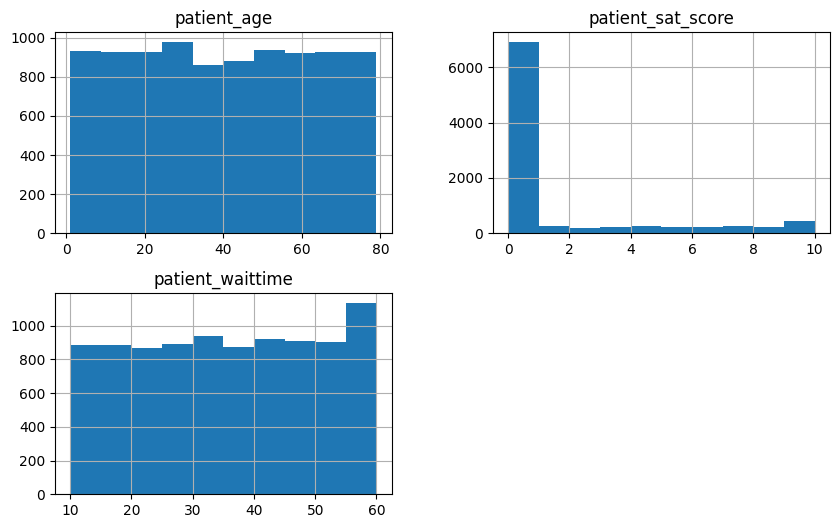

In [65]:
numeric_columns = ['patient_age', 'patient_sat_score', 'patient_waittime']

# Histograms
data[numeric_columns].hist(figsize=(10, 6))


<Axes: >

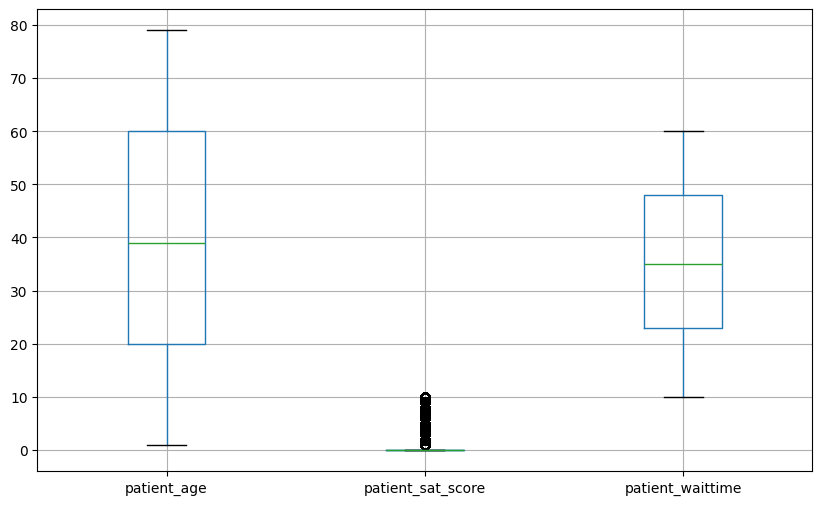

In [66]:
# Box plots
data[numeric_columns].boxplot(figsize=(10, 6))


In [67]:
# Box plot for patient_sat_score for clear visuals

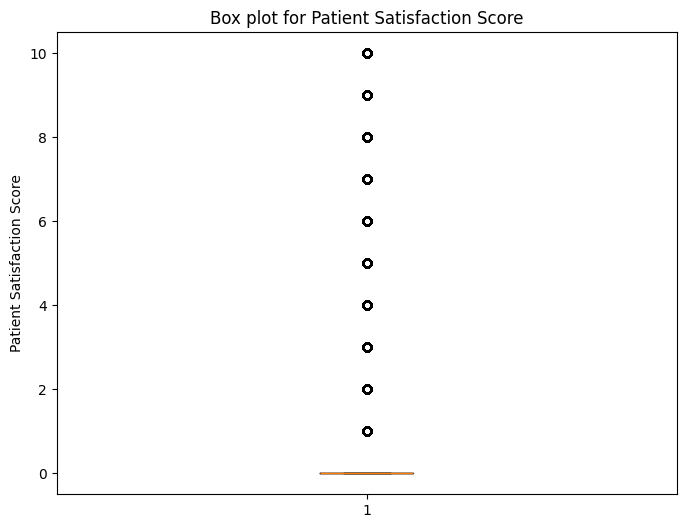

In [68]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.boxplot(data['patient_sat_score'])
plt.title('Box plot for Patient Satisfaction Score')
plt.ylabel('Patient Satisfaction Score')
plt.show()


In [69]:
categorical_columns = ['patient_gender', 'patient_race', 'patient_admin_flag', 'department_referral']

# Frequency counts
for column in categorical_columns:
    print(data[column].value_counts())

patient_gender
M          4705
F          4487
Unknown      24
Name: count, dtype: int64
patient_race
White                            2571
African American                 1951
Two or More Races                1557
Asian                            1060
Declined to Identify             1030
Pacific Islander                  549
Native American/Alaska Native     498
Name: count, dtype: int64
patient_admin_flag
True     4612
False    4604
Name: count, dtype: int64
department_referral
No Referral         5400
General Practice    1840
Orthopedics          995
Physiotherapy        276
Cardiology           248
Neurology            193
Gastroenterology     178
Renal                 86
Name: count, dtype: int64


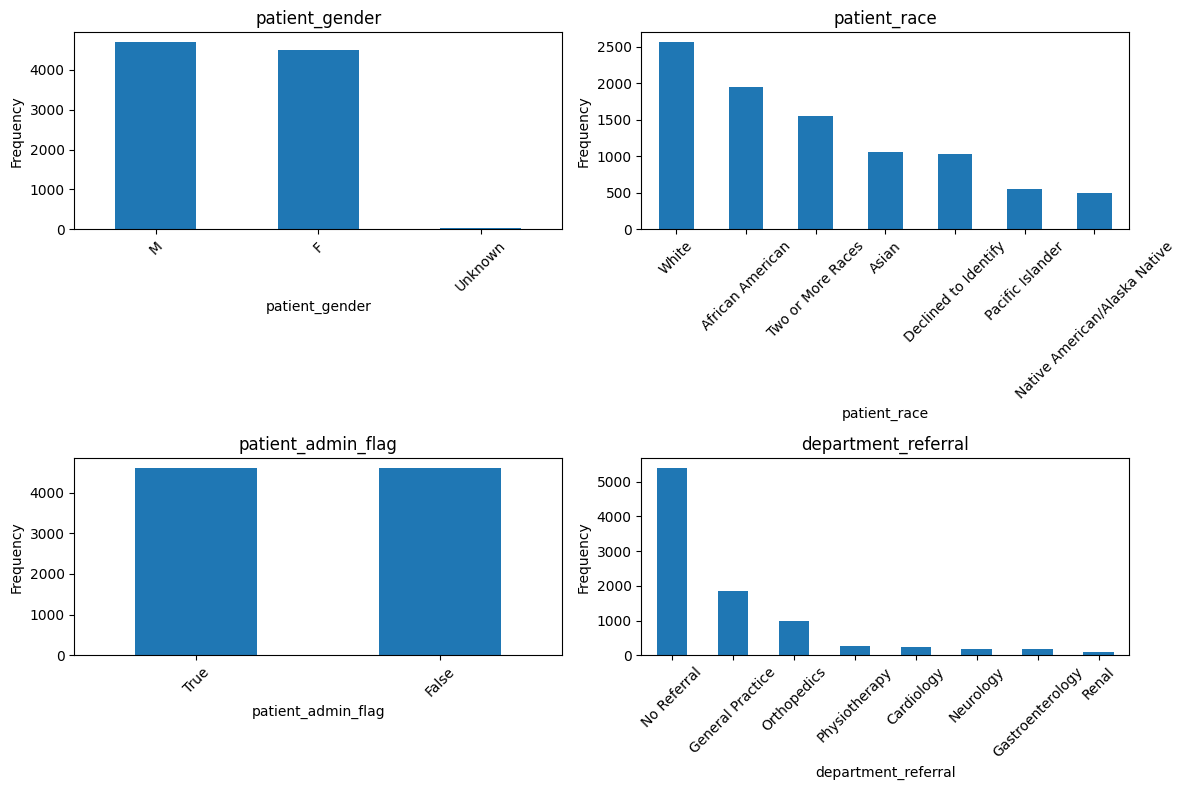

In [70]:
# Bar plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data[column].value_counts().plot(kind='bar', title=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
# Bivariate analysis

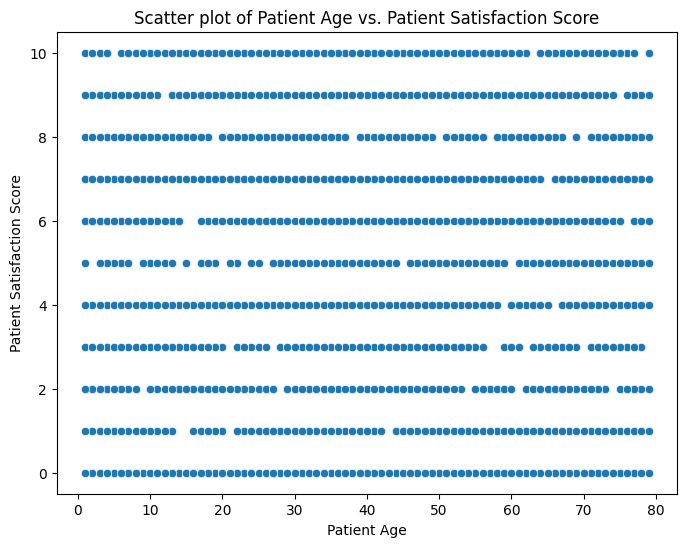

In [72]:
import seaborn as sns

# Scatter plot for patient_age vs. patient_sat_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='patient_age', y='patient_sat_score', data=data)
plt.title('Scatter plot of Patient Age vs. Patient Satisfaction Score')
plt.xlabel('Patient Age')
plt.ylabel('Patient Satisfaction Score')
plt.show()


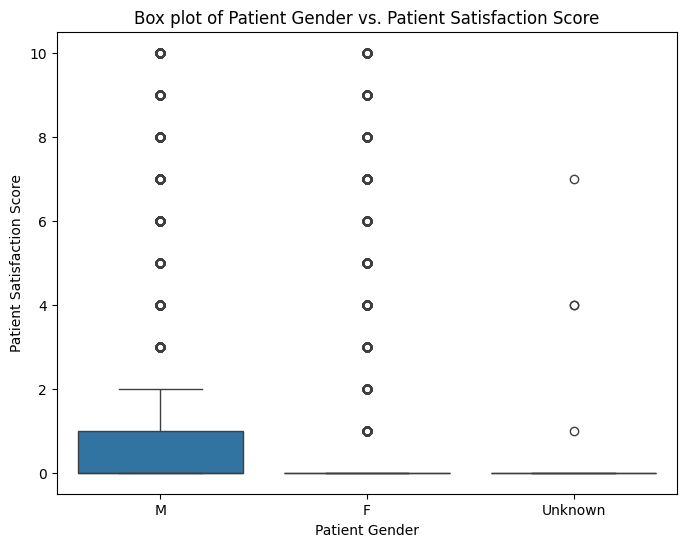

In [73]:
# Box plot for patient_gender vs. patient_sat_score
plt.figure(figsize=(8, 6))
sns.boxplot(x='patient_gender', y='patient_sat_score', data=data)
plt.title('Box plot of Patient Gender vs. Patient Satisfaction Score')
plt.xlabel('Patient Gender')
plt.ylabel('Patient Satisfaction Score')
plt.show()


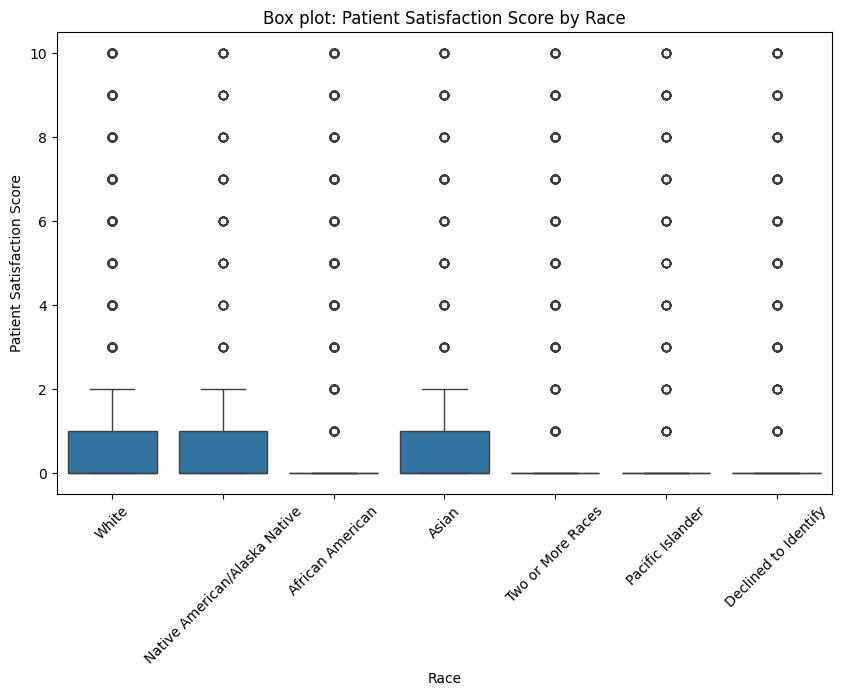

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='patient_race', y='patient_sat_score', data=data)
plt.title('Box plot: Patient Satisfaction Score by Race')
plt.xlabel('Race')
plt.ylabel('Patient Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


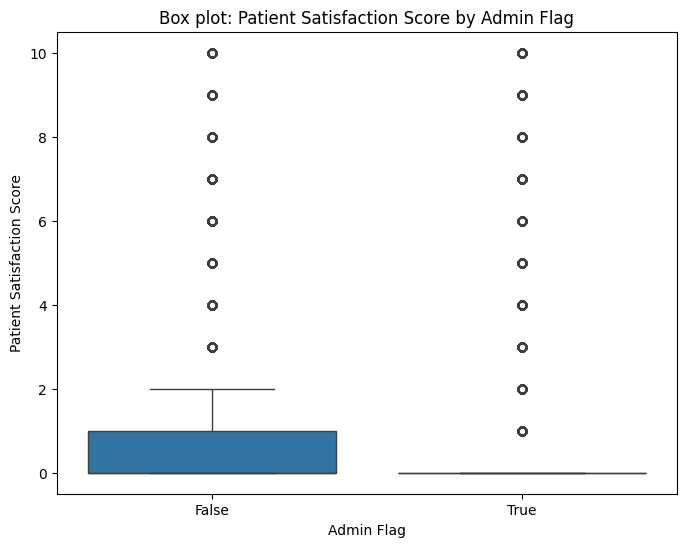

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='patient_admin_flag', y='patient_sat_score', data=data)
plt.title('Box plot: Patient Satisfaction Score by Admin Flag')
plt.xlabel('Admin Flag')
plt.ylabel('Patient Satisfaction Score')
plt.show()


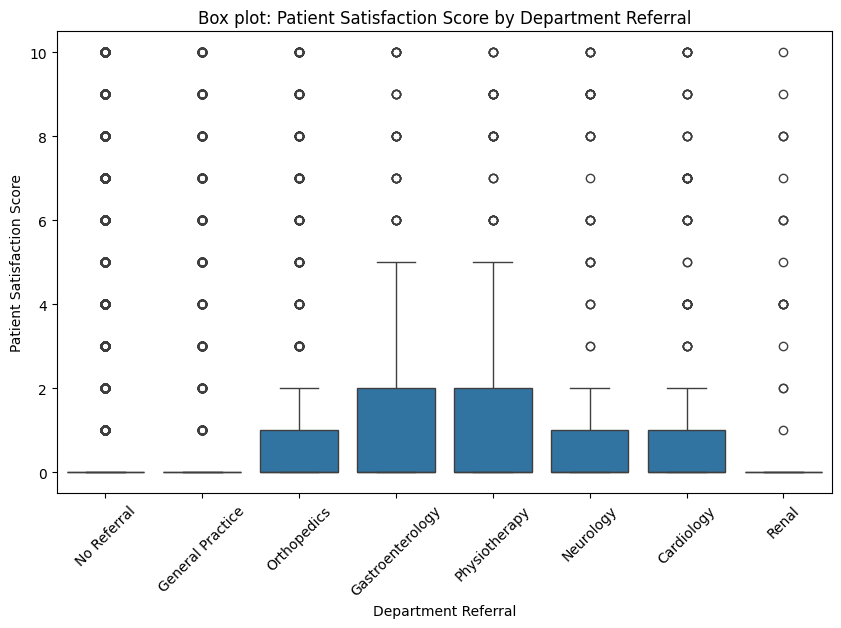

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department_referral', y='patient_sat_score', data=data)
plt.title('Box plot: Patient Satisfaction Score by Department Referral')
plt.xlabel('Department Referral')
plt.ylabel('Patient Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


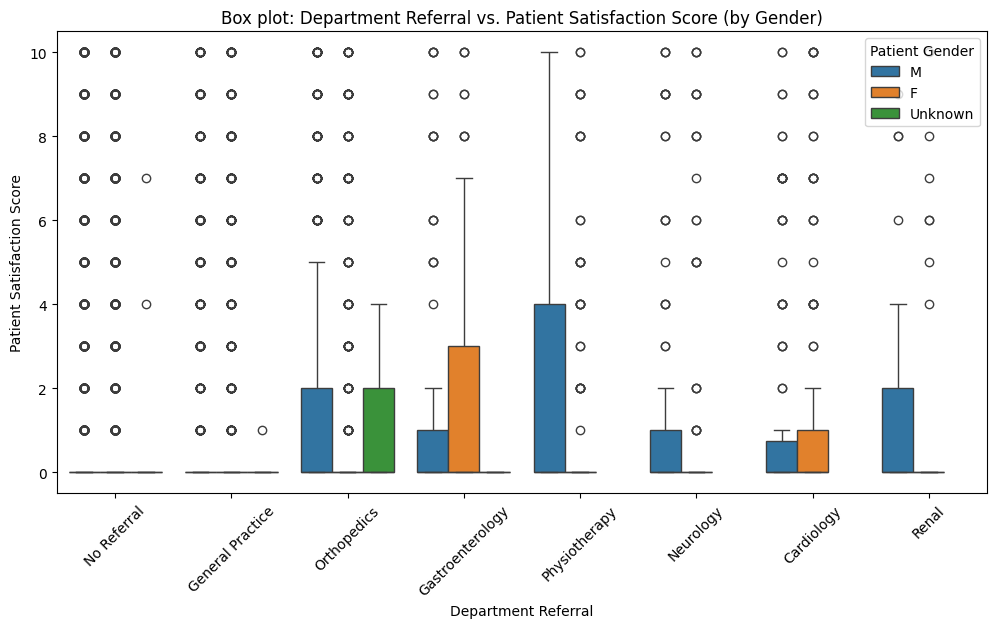

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department_referral', y='patient_sat_score', hue='patient_gender', data=data)
plt.title('Box plot: Department Referral vs. Patient Satisfaction Score (by Gender)')
plt.xlabel('Department Referral')
plt.ylabel('Patient Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Patient Gender')
plt.show()


In [78]:
# Hypothesis:

##############################################################################################################################
Null Hypothesis (H0): There is no significant difference in patient satisfaction scores between different patient genders.

Alternative Hypothesis (H1): There is a significant difference in patient satisfaction scores between different patient genders.
###############################################################################################################################

In [79]:
# Explanation

The hypothesis aims to explore whether patient gender has an impact on patient satisfaction scores. This is an important aspect to consider because healthcare experiences may vary based on factors such as gender-related differences in communication, treatment preferences, and perceived quality of care.

In [80]:
# Hypothesis Testing:

To test this hypothesis, we can use a statistical test such as the Analysis of Variance (ANOVA). ANOVA is suitable for comparing means across multiple groups simultaneously, which makes it appropriate for comparing patient satisfaction scores across different patient genders.

In [81]:
# Steps for Hypothesis Testing:

- Select Significance Level (α): We typically choose a significance level of 0.05, indicating a 5% risk of concluding that a difference exists when there is no actual difference.

- Identify Test Statistic: For comparing means across multiple groups, we'll use ANOVA.

- Perform ANOVA Test: Compute the F-statistic and p-value using ANOVA.

- Interpret Results: If the p-value is less than the chosen significance level (α), we reject the null hypothesis, indicating that there is a significant difference in patient satisfaction scores between different patient genders. If the p-value is greater than α, we fail to reject the null hypothesis.

In [82]:
import scipy.stats as stats

# Filter data for patient genders with non-null satisfaction scores
data_filtered = data.dropna(subset=['patient_sat_score'])

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(data_filtered[data_filtered['patient_gender'] == 'M']['patient_sat_score'],
                                      data_filtered[data_filtered['patient_gender'] == 'F']['patient_sat_score'])

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Compare p-value to significance level (α)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in patient satisfaction scores between genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in patient satisfaction scores between genders.")


F-statistic: 1.2758325541745013
p-value: 0.2587048229483514
Fail to reject the null hypothesis: There is no significant difference in patient satisfaction scores between genders.


# Predictive Modelling

### Relevance to Healthcare Quality: 
 Patient satisfaction is a crucial aspect of healthcare quality. It reflects patients' perceptions of their experiences with healthcare services, including aspects such as communication with healthcare providers, waiting times, cleanliness of facilities, and overall care received.

### Impact on Healthcare Outcomes: 
 Research has shown that patient satisfaction is associated with various healthcare outcomes, including treatment adherence, health outcomes, and healthcare utilization. Therefore, understanding the factors influencing patient satisfaction can help healthcare providers improve their services and ultimately enhance patient outcomes.

### Measurability:
 Patient satisfaction scores are often collected through surveys or feedback mechanisms, providing quantifiable data that can be used for analysis and modeling.

### Actionability:
 Identifying factors that influence patient satisfaction can enable healthcare providers to take actionable steps to address areas of improvement and enhance patient experiences.

### Stakeholder Interest:
 Patient satisfaction is of interest to various stakeholders in the healthcare system, including healthcare organizations, policymakers, and patients themselves. Predictive models based on patient satisfaction data can provide valuable insights for decision-making and policy development.

In [83]:
X = data[['patient_age', 'patient_gender', 'patient_race', 'patient_admin_flag', 'patient_waittime']]
y = data['patient_sat_score']

In [84]:
# One-hot encode categorical variables
X = pd.get_dummies(X)

In [85]:
X

,patient_age,patient_admin_flag,patient_waittime,patient_gender_F,patient_gender_M,patient_gender_Unknown,patient_race_African American,patient_race_Asian,patient_race_Declined to Identify,patient_race_Native American/Alaska Native,patient_race_Pacific Islander,patient_race_Two or More Races,patient_race_White
0,69,False,39,False,True,False,False,False,False,False,False,False,True
1,4,True,27,False,True,False,False,False,False,True,False,False,False
2,56,True,55,True,False,False,True,False,False,False,False,False,False
3,24,True,31,True,False,False,False,False,False,True,False,False,False
4,5,False,10,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,60,False,34,False,True,False,True,False,False,False,False,False,False
9212,63,False,55,False,True,False,False,False,False,False,False,False,True
9213,27,False,52,True,False,False,False,False,False,False,False,True,False
9214,53,True,51,False,True,False,False,False,False,False,False,False,True


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
# Predictions 
predictions = model.predict(X_test)

In [90]:
# model Evaluation
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.2162816212168166


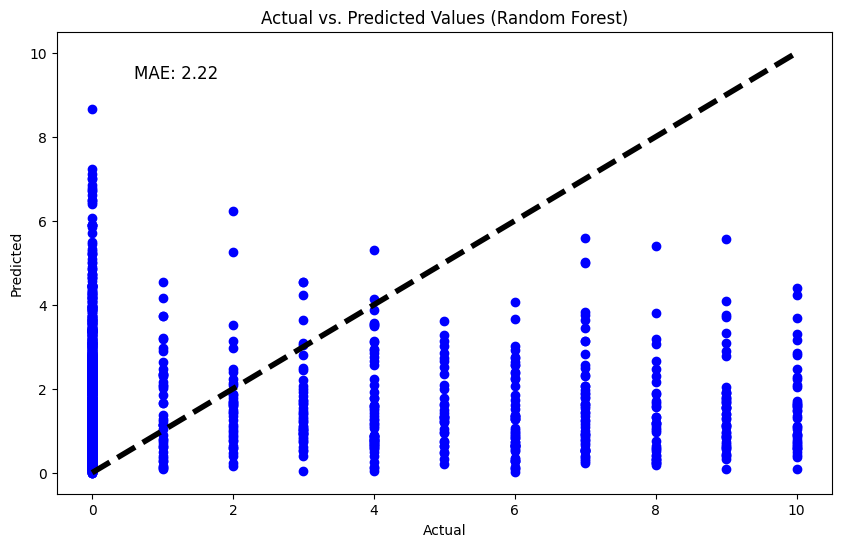

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.text(0.1, 0.9, f'MAE: {mae:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.show()

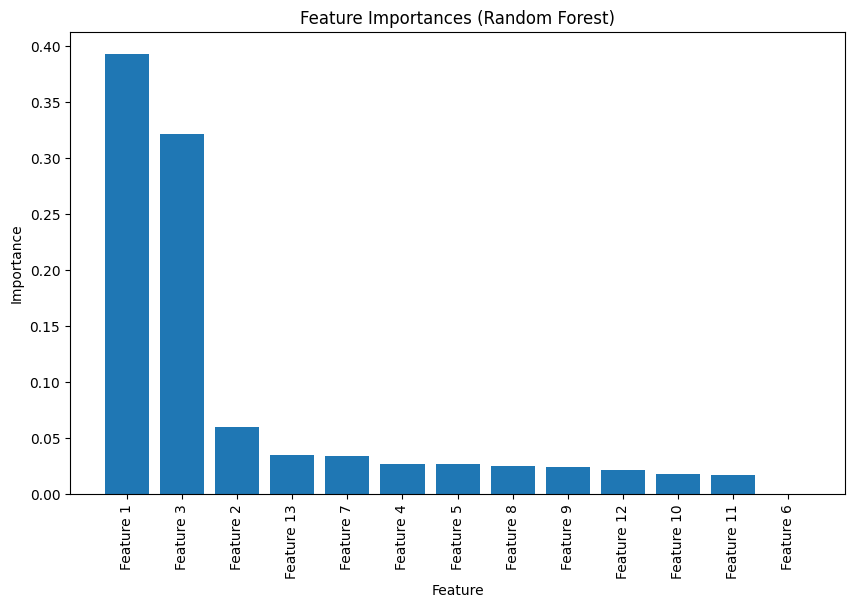

In [93]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

num_features = len(feature_importances)
sorted_features = [f'Feature {i+1}' for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(num_features), feature_importances[sorted_indices], align='center')
plt.xticks(range(num_features), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()

In [94]:
# Serialization 

In [95]:
import joblib

In [96]:
joblib.dump(model,"healthcare_RandReg.joblib")

['healthcare_RandReg.joblib']

In [ ]:
# END